In [41]:
import h5py
from scipy.io import readsav
import copy
import numpy as np
import matplotlib.pyplot as plt

In [5]:
f = readsav('data/atm_abs_o2a_11.h5'.replace('h5', 'out'))

wvl_center_oco = f.lamx*1000.0
print(wvl_center_oco)

wvl = wvl_center_oco[2]+0.000001

wvl_threshold = 1
index_wvl = np.argmin(np.abs(wvl_center_oco-wvl))

if abs(wvl_center_oco[index_wvl]-wvl) >= wvl_threshold:
    sys.exit('Error   [abs_oco_idl]: Cannot pick a close wavelength for %.2fnm from \'%s\'.' % (self.wvl, self.fname_idl))
else:
    wvl = wvl_center_oco[index_wvl]

Ng        = f.absgn[index_wvl]
wvls      = f.absgx[:Ng, index_wvl] * 1000.0
abso_coef = f.absgl[:Ng, index_wvl, :]

slit_func0     = f.absgy[:Ng, index_wvl]
slit_func      = np.empty(abso_coef.shape, dtype=slit_func0.dtype)
slit_func[...] = slit_func0[:, None]

solar     = f.solx[:Ng, index_wvl]



weight    = slit_func0/slit_func0.sum()
#self.Ng   = Ng
nwl  = wvls.size
coef = {
        'wvl'       : {'name':'Wavelength'                     , 'data':wvl, 'units':'nm'},
        'abso_coef' : {'name':'Absorption Coefficient (Nz, Ng)', 'data':np.transpose(abso_coef)},
        'slit_func' : {'name':'Slit Function (Nz, Ng)'         , 'data':np.transpose(slit_func)},
        'solar'     : {'name':'Solar Factor (Ng)'              , 'data':solar},
        'weight'    : {'name':'Weight (Ng)'                    , 'data':weight}
             }

[760.75385 761.3926  760.29016 761.37634 759.68756 761.34375 766.2888
 763.53906 768.5151  772.5164  760.2401 ]


In [123]:
f = h5py.File('data/atm_abs_o2a_11.h5', 'r')

wvl_center_oco = f['lamx'][...]*1000.0

print(wvl_center_oco)

wvl = wvl_center_oco[2]+0.000001

wvl_threshold = 1

index_wvl = np.argmin(np.abs(wvl_center_oco-wvl))

wvl = wvl_center_oco[index_wvl]

Ng_h5       = f['absgn'][...][index_wvl]
wvls_h5      = f['absgx'][...][index_wvl, :Ng_h5].T * 1000.0
abso_coef_h5 = f['absgl'][...][:, index_wvl, :Ng_h5].T

slit_func0_h5     = f['absgy'][...][index_wvl, :Ng].T
slit_func_h5      = np.empty(abso_coef.shape, dtype=slit_func0.dtype)
slit_func_h5[...] = slit_func0[:, None]

solar_h5     = f['solx'][index_wvl, :Ng].T



weight_h5    = slit_func0_h5/slit_func0_h5.sum()
#self.Ng   = Ng
nwl_h5  = wvls_h5.size
coef_h5 = {
        'wvl'       : {'name':'Wavelength'                     , 'data':wvl, 'units':'nm'},
        'abso_coef' : {'name':'Absorption Coefficient (Nz, Ng)', 'data':np.transpose(abso_coef)},
        'slit_func' : {'name':'Slit Function (Nz, Ng)'         , 'data':np.transpose(slit_func)},
        'solar'     : {'name':'Solar Factor (Ng)'              , 'data':solar},
        'weight'    : {'name':'Weight (Ng)'                    , 'data':weight}
             }

[760.40641733 761.39259413 759.97292515 763.77135061 760.32334202
 763.08641377 762.72414042 766.83669774 764.41522664 772.51646071
 760.24012927]


In [59]:
abso_coef.shape

(126, 29)

In [58]:
abso_coef_h5.shape

(137, 29)

In [31]:
print(Ng, Ng_h5)

126 137


In [46]:
abso_coef_h5.min()

1.6641026495325663e-06

In [47]:
abso_coef_h5.max()

13.982582161776566

In [43]:
abso_coef.shape

(126, 29)

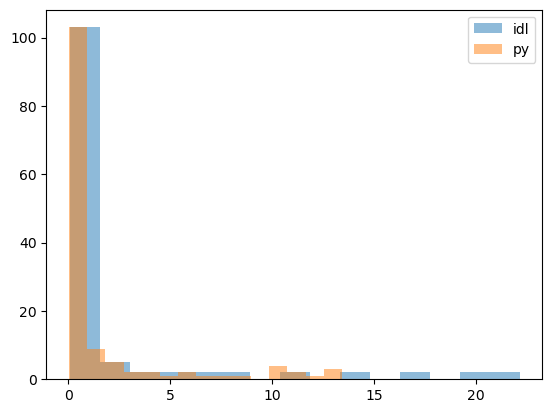

In [94]:
z = 2
plt.hist(abso_coef[:, z], label='idl', alpha=0.5, bins=15)
plt.hist(abso_coef_h5[:, z], label='py', alpha=0.5, bins=15)
plt.legend()

In [50]:
print(abso_coef.mean(), abso_coef_h5.mean())

1.074014 0.7882085649205333


In [51]:
print(solar.mean(), solar_h5.mean())

1.246485 1.2760840592373575


In [52]:
print(weight.mean(), weight_h5.mean())

0.007936509 0.007936507936507936


In [53]:
print(nwl, nwl_h5)

126 137


In [56]:
print(slit_func.mean(), slit_func_h5.mean())

0.5278127 0.5278127


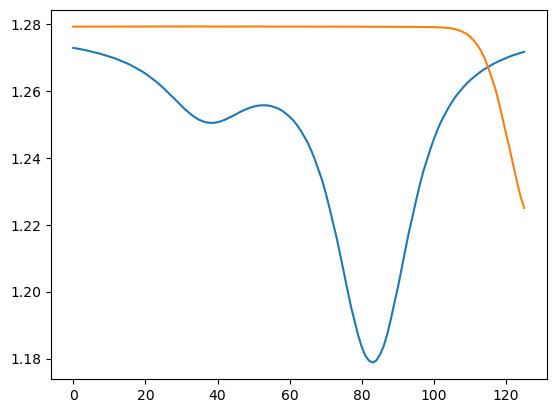

In [125]:
plt.plot(solar)
plt.plot(solar_h5)

In [100]:
solar.shape

(126,)

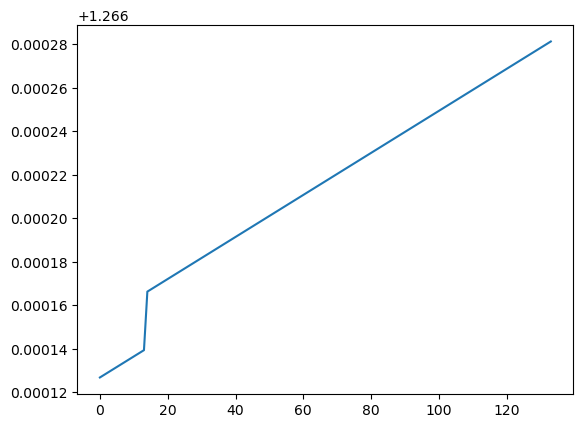

In [132]:
plt.plot(f['solx'][8, :])

In [122]:
f['solx'][4, :]

array([1.27717193, 1.27714677, 1.27712162, 1.27712259, 1.27709744,
       1.27707228, 1.27704713, 1.27702198, 1.27699682, 1.27697167,
       1.27694651, 1.27692136, 1.2768962 , 1.27684492, 1.27681977,
       1.27679462, 1.27676946, 1.27674431, 1.27669303, 1.27666787,
       1.27661929, 1.27659144, 1.27656454, 1.276515  , 1.27646895,
       1.27643857, 1.27638729, 1.27633601, 1.27631085, 1.27625957,
       1.27620742, 1.27615431, 1.27610573, 1.27605445, 1.27597704,
       1.27592576, 1.27587448, 1.27579887, 1.27574579, 1.27566838,
       1.27561275, 1.27553969, 1.27546229, 1.27538226, 1.27530197,
       1.27520664, 1.2751274 , 1.27504738, 1.27494198, 1.27484728,
       1.27473989, 1.27463361, 1.274521  , 1.27440539, 1.27427561,
       1.27414159, 1.2740101 , 1.27388864, 1.27373258, 1.27357156,
       1.27340794, 1.27326434, 1.27307987, 1.27287003, 1.27268451,
       1.27247136, 1.27225374, 1.27201173, 1.27176972, 1.27148014,
       1.27123625, 1.2709209 , 1.27060051, 1.27025625, 1.26992

In [133]:
f['tx'][...]

array([0.14510538, 0.24012792, 0.33432227, 0.4305932 , 0.52538131,
       0.61919512, 0.71610982, 0.8117753 , 0.90546069, 0.99986708,
       0.05082127])